<a href="https://colab.research.google.com/github/Shreyabansal3112/image-basics/blob/main/practical_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Experiment-4: Histogram Matching and Specification on image
import numpy as np
import pandas as pd
import cv2 as cv 
import matplotlib.pyplot as plt

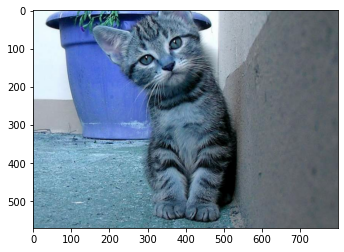

In [ ]:
ima = cv.imread('cat.jpg')
plt.imshow(ima)

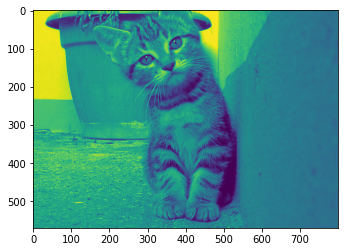

In [ ]:
gray_image = cv.cvtColor(ima, cv.COLOR_BGR2GRAY)
plt.imshow(gray_image)

In [ ]:
# function of histogram equalization
def histeq(im, nbr_bins = 256):
  """ Histogram equalization of a grayscale image.  """
  # get the image histogram
  imhist, bins = np.histogram(im.flatten(), nbr_bins, [0, 256])
  cdf = imhist.cumsum() # cumulative distribution function
  cdf = imhist.max()*cdf/cdf.max()  #normalize
  cdf_mask = np.ma.masked_equal(cdf, 0)
  cdf_mask = (cdf_mask - cdf_mask.min())*255/(cdf_mask.max()-cdf_mask.min())
  cdf = np.ma.filled(cdf_mask,0).astype('uint8')
  return cdf[im.astype('uint8')]


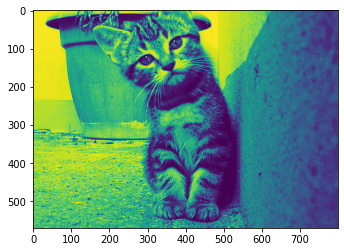

In [ ]:
im5 = histeq(gray_image)
plt.imshow(im5)

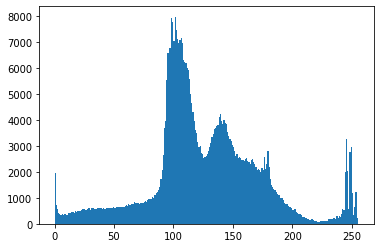

In [ ]:
# Extra: try to visualize the histogram of the image after histogram equalization
# Before histogram equalization
plt.hist(gray_image.ravel(),bins = 256, range = [0, 256])
plt.show()

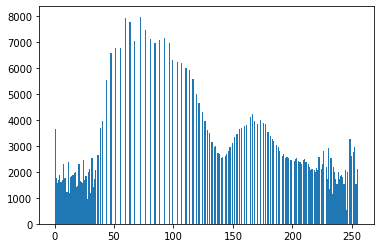

In [ ]:
# After histogram equalization
plt.hist(im5.ravel(),bins = 256, range = [0, 256])
plt.show()

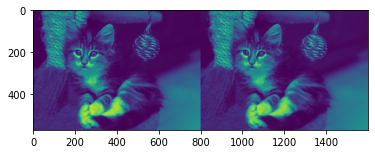

In [ ]:
# The lightness level of the gray_image decreases after this step
im4 = 255.0*(gray_image/255.0)**2
plt.imshow(im4)

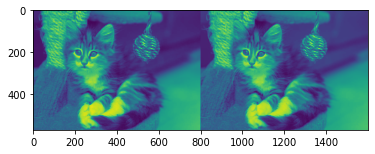

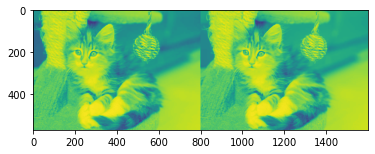

In [ ]:
# Apply log transformation method 
c = 255 / np.log(1 + np.max(gray_image)) 
log_image = c * (np.log(gray_image + 1)) 
   
# Specify the data type so that 
# float value will be converted to int 
log_image = np.array(log_image, dtype = np.uint8) 
   
# Display both images 
plt.imshow(gray_image) 
plt.show() 
plt.imshow(log_image) 
plt.show() 

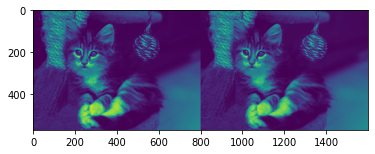

In [ ]:
# Trying 4 gamma values. 
for gamma in [0.1, 0.5, 1.2, 2.2]: 
      
    # Apply gamma correction. 
    gamma_corrected = np.array(255*(gray_image / 255) ** gamma, dtype = 'uint8') 
  
    plt.imshow(gamma_corrected) 
    # Save edited images. 
    #cv2.imwrite('gamma_transformed'+str(gamma)+'.jpg', gamma_corrected) 

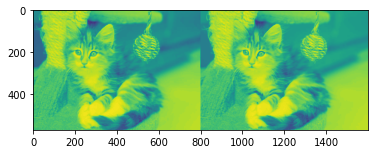

In [ ]:
  
# Apply gamma correction. 
gamma_corrected = np.array(255*(gray_image / 255) ** 0.1, dtype = 'uint8') 
  
plt.imshow(gamma_corrected) 


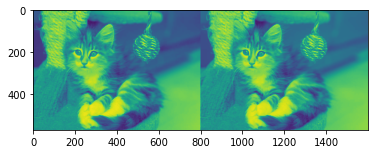

In [ ]:
# Apply gamma correction. 
gamma_corrected = np.array(255*(gray_image / 255) ** 0.5, dtype = 'uint8') 
  
plt.imshow(gamma_corrected) 


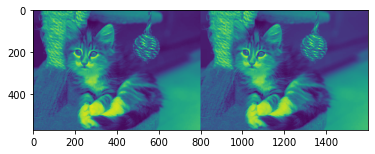

In [ ]:
# Apply gamma correction. 
gamma_corrected = np.array(255*(gray_image / 255) ** 1.1, dtype = 'uint8') 
  
plt.imshow(gamma_corrected) 


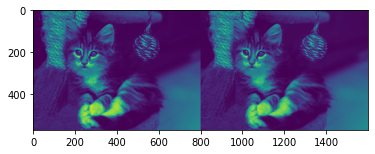

In [ ]:
# Apply gamma correction. 
gamma_corrected = np.array(255*(gray_image / 255) ** 2.2, dtype = 'uint8') 
  
plt.imshow(gamma_corrected) 
